# 1-D, 3-Site Hubbard Model

The Hubbard Hamiltonian for a 1-D chain of sites is:

\begin{equation} H = -t\sum_{<ij>,\sigma}(\hat{c}_{i_\sigma}\hat{c}_{j_\sigma} + \hat{c}_{j_\sigma}^\dagger\hat{c}_{i_\sigma} ) + U\sum_i\hat{c}_{i_\uparrow}^{\dagger}\hat{c}_{i_\uparrow}\hat{c}_{i_\downarrow}^{\dagger}\hat{c}_{i_\downarrow}
\end{equation}
and under the Jordan-Wigner mapping, this Hamiltonian becomes:

\begin{equation}
H = -\frac{t}{2}\sum_{<ij>}Z_{i+1:j-1}(X_{i}X_{j} + Y_{i}Y_{j}) + \frac{U}{4}\sum_{ij}(I-Z_{i})(I-Z_{j})
\end{equation}
where $Z_{i}$, $X_{i}$, and $Y_{i}$ are the corresponding Pauli matrices acting on the $i^{th}$ fermionic mode and for a chain with only 3-sites, there are no Pauli $Z$ strings in the hopping term of the Hamiltonian for a one-dimensional chain.

## 3-Site Hamiltonian and Qubit Mapping

Writing out the sum over three sites, the Hamiltonian becomes:

\begin{align}
     H = &-\frac{t}{2}(X_0X_1 + Y_0Y_1) - \frac{t}{2}(X_1X_2 + Y_1Y_2) \nonumber \\ 
&-\frac{t}{2}(X_3X_4 + Y_3Y_4) - \frac{t}{2}(X_4X_5 + Y_4Y_5) \nonumber\\
&+ \frac{U}{4}(I-Z_0)(I-Z_3)+ \frac{U}{4}(I-Z_1)(I-Z_4) + \frac{U}{4}(I-Z_2)(I-Z_5) \nonumber\\
= &H_{01} + H_{12} + H_{23} + H_{34} + H_{03} + H_{14} + H_{25}
\end{align}

### Qubit Mapping

Each site in a 3-site chain is represented by two qubits, one for each spin, and the wavefunction is represented as

$$ \ket{\psi} = \ket{q_0}\ket{q_1}\ket{q_2}\ket{q_3}\ket{q_4}\ket{q_5} $$

where $\ket{q_i} = \{ \ket{0}, \ket{1} \} $ represent unoccupied or occupied sites, $i=0,1,2$ are the spin up electron occupations and $i=3,4,5$ are the spin down electron occupations.


## Time Evolution

We want to simulate the time evolution of $\ket{\psi}$ via 

$$ \ket{\psi(t+\Delta t)} = e^{-iH\Delta t}\ket{\psi(t)} $$


We can do this via the Suzuki-Trotter formula which states that, to first order in $\Delta t$

$$e^{iH\Delta t} \approx e^{iH_{10}^{\uparrow}\Delta t}e^{iH_{12}^{\uparrow}\Delta t}e^{iH_{10}^{\downarrow}\Delta t}e^{iH_{12}^{\downarrow}\Delta t}e^{iH_0\Delta t}e^{iH_1\Delta t}e^{iH_2\Delta t}.$$

This is the time evolution operator which evolves the system by a small amount of time $\Delta t$. To then evolve an initial state for some reasonable (let's say for $t = 0\rightarrow 2\pi$) we will need to apply this operator several times in the same circuit.


So what do the gates look like for each of these terms?

#### Hopping Terms

For each pair of hopping terms we have
$$e^{-i\Delta t(\frac{-t}{2})(X_iX_j + Y_iY_j)} \approx e^{\frac{it\Delta t}{2}X_iX_j} e^{\frac{it\Delta t}{2}Y_iY_j}.$$

Expanding the first term on the right hand side
$$
\begin{align}
e^{\frac{it\Delta t}{2}X_iX_j} = & \sum_{k=0}^{\infty} \frac{1}{k!}\left(\frac{it\Delta t}{2}X_iX_j\right)^k \nonumber \\
 =& \sum_{k, even}\frac{i^k}{k!}\left( \frac{t\Delta t}{2} \right)^k I + \sum_{k, odd}\frac{i^k}{k!}\left( \frac{t\Delta t}{2} \right)X_i X_j \nonumber \\ 
 = &\cos\left(\frac{t\Delta t}{2}\right)I + i\sin\left( \frac{t\Delta t}{2}\right)X_i X_j \nonumber \\
 = &\begin{pmatrix}\cos\theta & 0 & 0 & i\sin\theta \\ 0 & \cos\theta & i\sin\theta & 0 \\ 0 & i\sin\theta & \cos\theta & 0 \\ i\sin\theta & 0 & 0 & \cos\theta\end{pmatrix},
\end{align} $$
with $\theta=\frac{t\Delta t}{2}$, and written in the $\ket{q_{i}q_{j}}$ basis.

Similarly for the $Y_i Y_j$ terms

\begin{align}
    e^{i\frac{t\Delta t}{2}Y_i Y_j} =& \cos\left(\frac{t\Delta t}{2}\right)I + i\sin\left(\frac{t\Delta t}{2}\right)Y_i Y_j \nonumber \\
= & \begin{pmatrix}\cos\theta & 0 & 0 & -i\sin\theta \\ 0 & \cos\theta & i\sin\theta & 0 \\ 0 & i\sin\theta & \cos\theta & 0 \\ -i\sin\theta & 0 & 0 & \cos\theta\end{pmatrix}.
\end{align}


Note also that these matrices are diagonal save for the 4x4 block corresponding to a gate acting on qubits $i$ and $j$.

### On-Site Terms


Now we'll expand the on-site term, $e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)}$.  First we examine the powers of $(I-Z_i)(I-Z_j)$:


$$ 
\begin{align} (I-Z_i)^2(I-Z_j)^2 &= (I + I - 2Z_i)(I+I-2Z_j) = 4(I-Z_i)(I-Z_j) \\
(I-Z_i)^3(I-Z_j)^3& = (I-Z_i)(I-Z_j)(I-Z_i)^2(I-Z_j)^2 \nonumber \\
&= 4(I-Z_i)^2(I-Z_j)^2 = 16(I-Z_i)(I-Z_j)\\
(I-Z_i)^4(I-Z_j)^4& = 16(I-Z_i)^2(I-Z_j)^2 = 4^3(I-Z_i)(I-Z_j)\\
\implies (I-Z_i)^k(I-Z_j)^k& = 4^{k-1}(I-Z_i)(I-Z_j), \end{align} $$

then writing out the expansion of $e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)}$ we get

\begin{align} e^{i\frac{U\Delta t}{4}(I-Z_i)(I-Z_j)} &= \sum_k \frac{1}{k!}\left(\frac{i\Delta tU}{4}\right)^k(I-Z_i)^k(I-Z_j)^k \\
&= I+(I-Z_i)(I-Z_j)\sum_k \frac{\left(i\Delta tU\right)^k}{k!}\frac{4^{k-1}}{4^k} - \frac{1}{4}(I-Z_i)(I-Z_j) \\
& = I-\frac{1}{4}(I-Z_i)(I-Z_j) + \frac{1}{4}e^{iU\Delta t}(I-Z_i)(I-Z_j)  \\
& \boxed{= I-(I-Z_i)(I-Z_j)\left(1-e^{iU\Delta t} \right) } \\
&= \begin{pmatrix}1 & 0 & 0 & 0\\ 0 & 1& 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{iU\Delta t} \end{pmatrix} .
\end{align}


In [3]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.transpiler import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit import Parameter
from qiskit.circuit.library import evolved_operator_ansatz
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2, EstimatorV2, Batch
from qiskit_ibm_runtime.fake_provider import FakeManilaV2, FakeMelbourneV2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


from qiskit.primitives import StatevectorSampler

### Initial Functions

The code below creates two functions, `construct_hamiltonian()` creates the Hamiltonian in terms of `SparsePauliOp` objects and `construct_evolved_circuit()` returns a circuit which executes the approximated time evolution operator on an initial state.

In [7]:
# Construct the Hubbard Hamiltonian after JW transform
def construct_hamiltonian(hopping, repulsion, num_sites):
    num_orbitals = 2*num_sites
    hopping_operators = []
    repulsion_operators = []
    for site in range(0, num_sites-1):
        hopping_operators.append(hopping*SparsePauliOp.from_sparse_list(
            [("XX", [site, site+1], 1),
             ("YY", [site, site+1], 1),
            ("XX", [num_sites+site, num_sites+site+1], 1),
             ("YY", [num_sites+site, num_sites+site+1], 1)], 
            num_qubits=num_orbitals))
        
        number_op_up = SparsePauliOp.from_sparse_list([("I", [site], 1)], num_qubits=num_orbitals) - SparsePauliOp.from_sparse_list([("Z", [site], 1)], num_qubits=num_orbitals)
        number_op_down = SparsePauliOp.from_sparse_list([("I", [site+num_sites], 1)], num_qubits=num_orbitals) - SparsePauliOp.from_sparse_list([("Z", [site+num_sites], 1)], num_qubits=num_orbitals)
        repulsion_operators.append(repulsion*(number_op_up @ number_op_down))
    hamiltonian = sum(hopping_operators) + sum(repulsion_operators)
    return hamiltonian

# Construct a circuit which evolves a fixed initial state in time
def construct_evolved_circuit(hamiltonian, dt, num_trotter_steps, num_time_steps):
    timestep_circuit = evolved_operator_ansatz(hamiltonian, reps=num_trotter_steps)
    evolved_state = QuantumCircuit(timestep_circuit.num_qubits)
    
    # Initial state
    evolved_state.x(0)
    
    for step in range(num_time_steps):
        evolved_state.compose(timestep_circuit, inplace=True)
    return evolved_state
        


### System Parameters
The cell below defines our system parameters

In [12]:
hopping_energy = 1.0
repulsion_energy = 2.0
num_sites = 5
num_orbitals = num_sites*2
dt = 0.2
time_steps = 30
trotter_steps = 5

hamiltonian = construct_hamiltonian(hopping_energy, repulsion_energy, num_sites)
print(hamiltonian)

SparsePauliOp(['IIIIIIIIXX', 'IIIIIIIIYY', 'IIIXXIIIII', 'IIIYYIIIII', 'IIIIIIIXXI', 'IIIIIIIYYI', 'IIXXIIIIII', 'IIYYIIIIII', 'IIIIIIXXII', 'IIIIIIYYII', 'IXXIIIIIII', 'IYYIIIIIII', 'IIIIIXXIII', 'IIIIIYYIII', 'XXIIIIIIII', 'YYIIIIIIII', 'IIIIIIIIII', 'IIIIZIIIII', 'IIIIIIIIIZ', 'IIIIZIIIIZ', 'IIIIIIIIII', 'IIIZIIIIII', 'IIIIIIIIZI', 'IIIZIIIIZI', 'IIIIIIIIII', 'IIZIIIIIII', 'IIIIIIIZII', 'IIZIIIIZII', 'IIIIIIIIII', 'IZIIIIIIII', 'IIIIIIZIII', 'IZIIIIZIII'],
              coeffs=[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j,
  2.+0.j, -2.+0.j, -2.+0.j,  2.+0.j,  2.+0.j, -2.+0.j, -2.+0.j,  2.+0.j,
  2.+0.j, -2.+0.j, -2.+0.j,  2.+0.j,  2.+0.j, -2.+0.j, -2.+0.j,  2.+0.j])


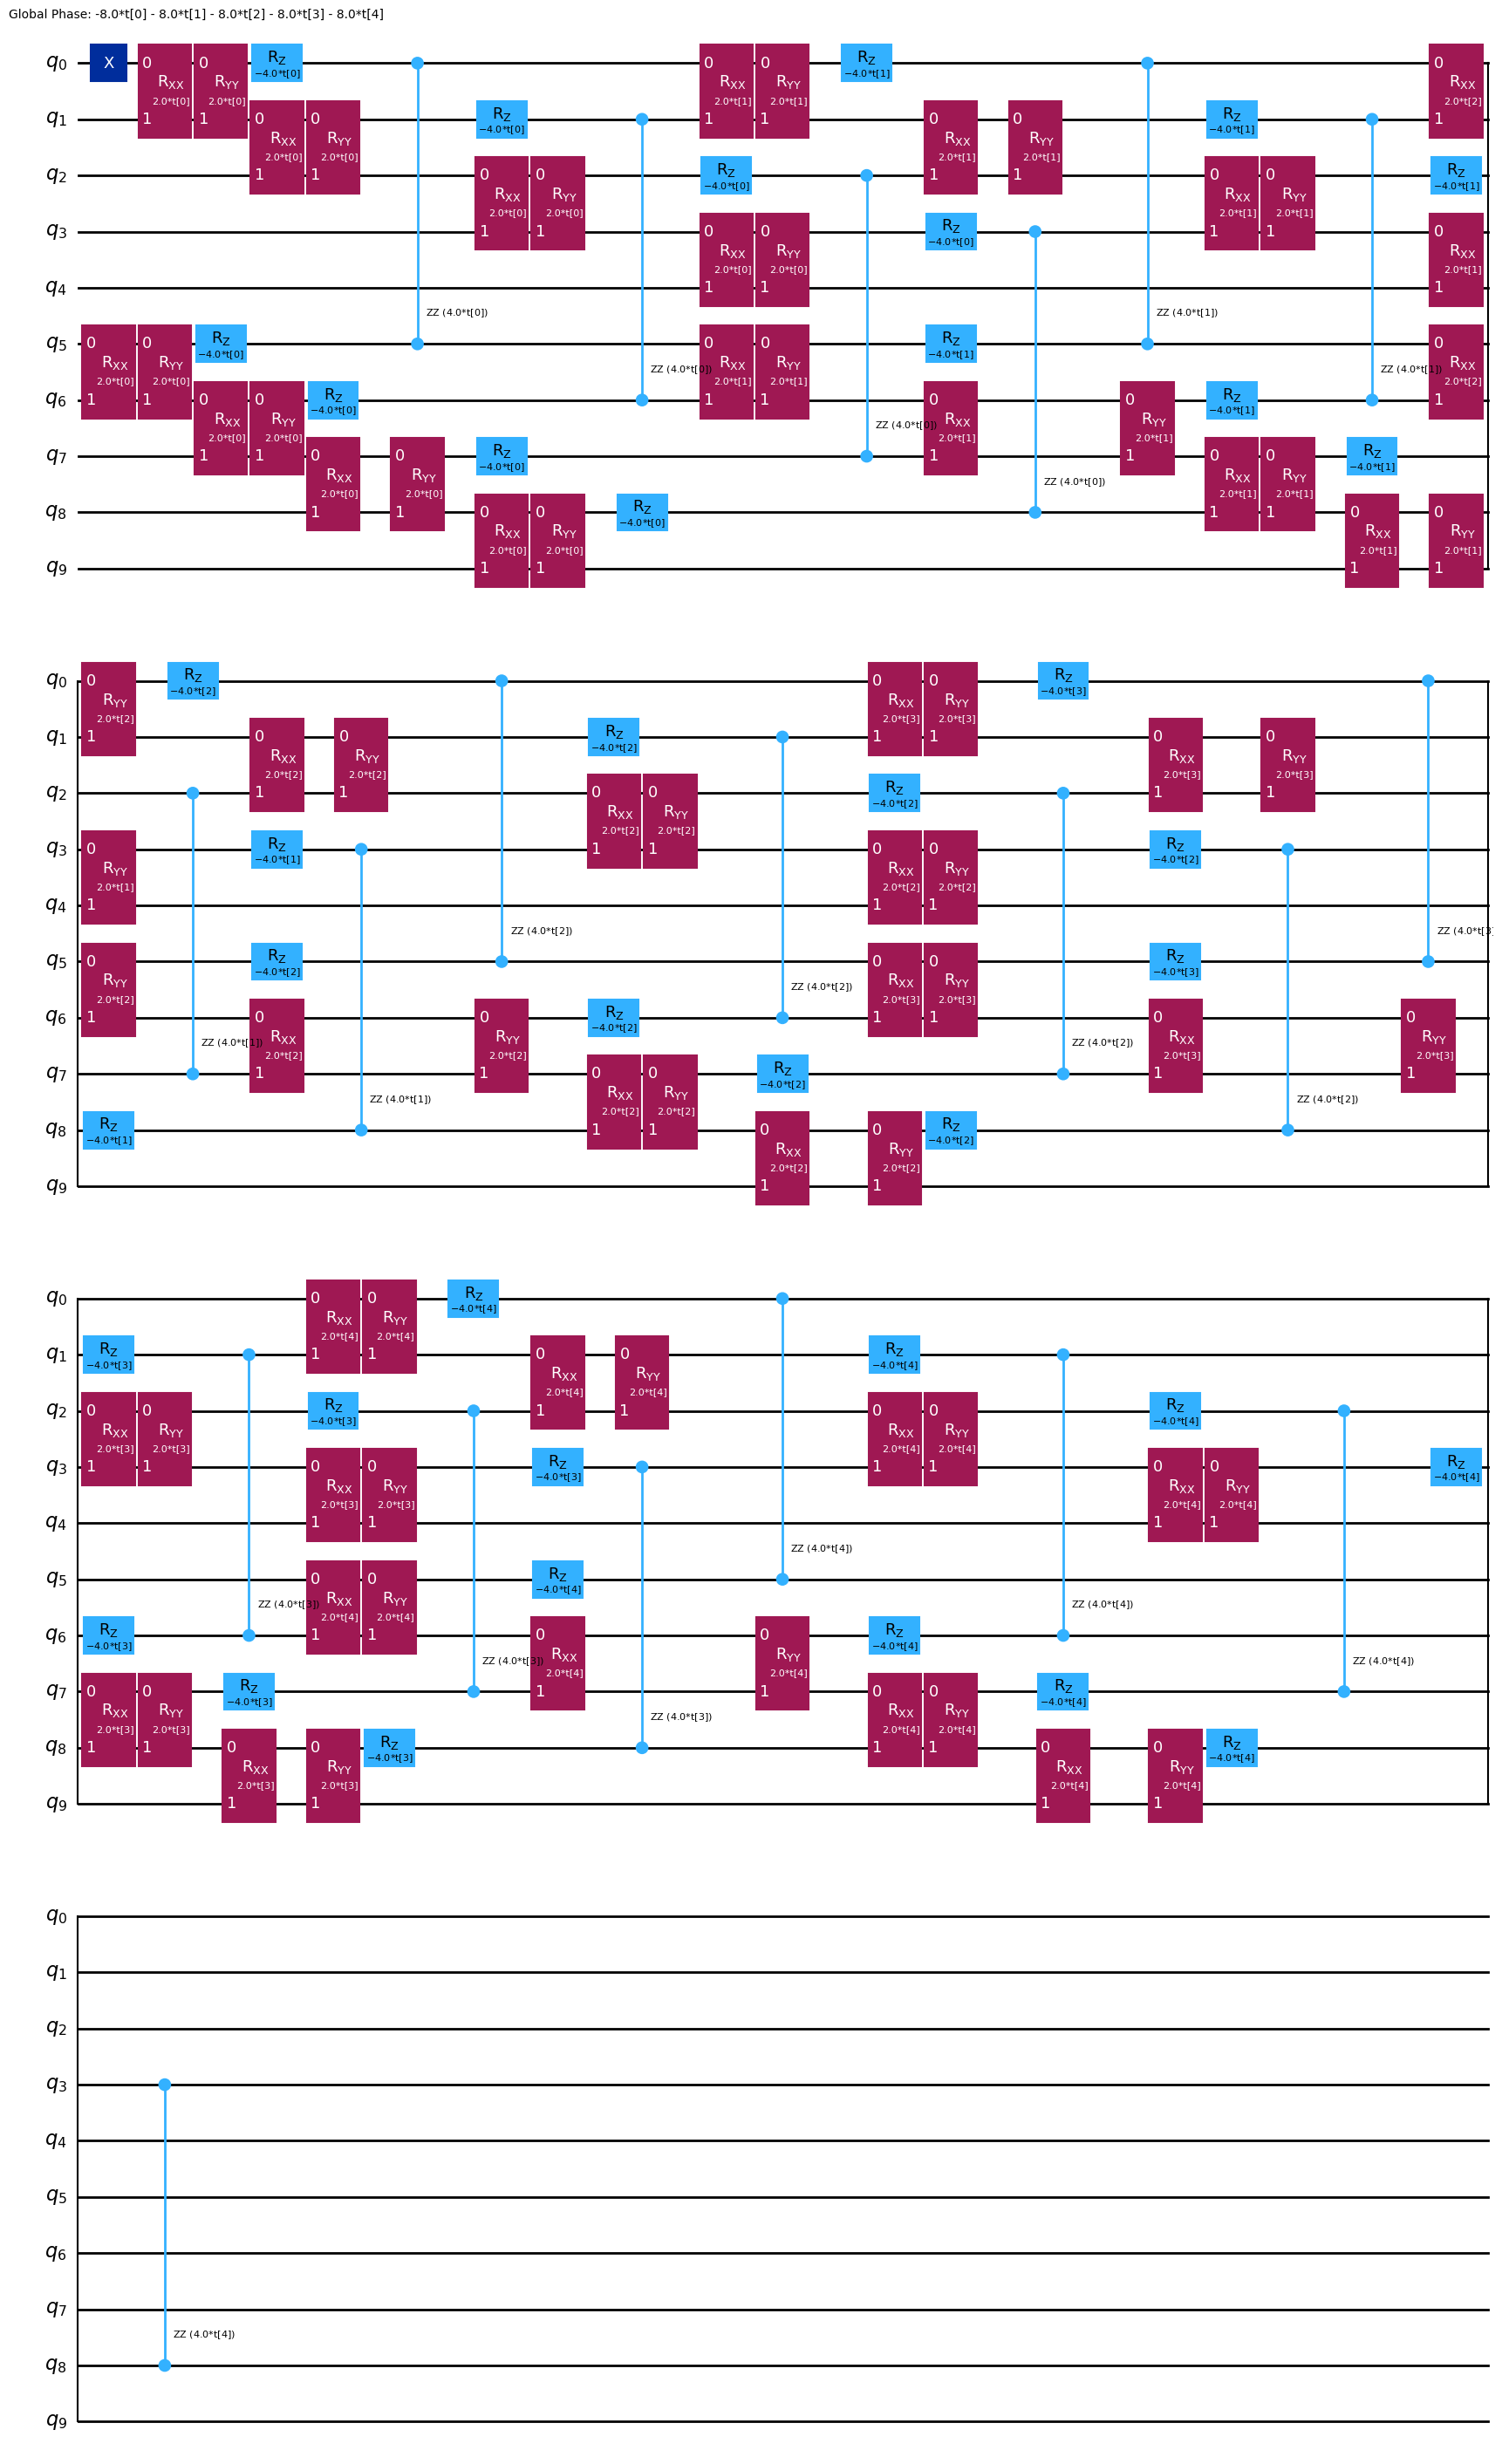

In [13]:
# Here is what the circuit looks like for a single application of our approximated time evolution operator
evolution_circuit = construct_evolved_circuit(hamiltonian, dt, trotter_steps,1)
evolution_circuit.draw('mpl')

## Construct circuits and execute

The first cell below constructs `time_steps` number time evolution circuits, each of which evolves the initial state by `dt * n` times. (If we were running this on a real QPU this would also be where we transpile the circuits.)

The second cell will execute all of these circuits and store the results in a list called `jobs`. For this example we just use the `StatevectorSampler()`, but you can play around with executing this on a real QPU. Be mindful these circuits end up being quite deep and you will need to apply error mitigation in order to refine the noise (doing so also requires a lot QPU time).

In [14]:
# Construct transpiled circuits
circuits = []
backend = FakeMelbourneV2()
service = QiskitRuntimeService()
#backend = service.least_busy(min_num_qubits=num_orbitals, use_fractional_gates=True)
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)
for step in range(time_steps):
    evolved_state = construct_evolved_circuit(hamiltonian, dt, trotter_steps, step)
    evolved_state.measure_all()
    circuits.append(evolved_state)


In [15]:
# Execute circuits on backend
shots = 2048
jobs = []
# Execute circuits all at once
with Batch(backend):
    #sampler = SamplerV2(mode=backend)
    sampler = StatevectorSampler()
    for circuit in circuits:
        job = sampler.run([(circuit, [dt/(2*trotter_steps)]*len(circuit.parameters))], shots=shots)
        jobs.append(job)
        print(f'Running job: {job.job_id()}')



Running job: de4a2562-285c-4f52-b13a-1ceb6b61af11
Running job: ad1c1fbe-827b-412f-b8ea-9b0edf997134
Running job: 6f8e6854-587e-4e5a-bc3b-d8e0d87d7f45
Running job: 00569f79-fd81-4992-b21c-d7fe65b064bd
Running job: 4381b387-f9ed-4869-8111-5b0f52836f95
Running job: 73308956-ac66-48fb-b62a-dea0754b6f6e
Running job: 52c1ec1c-96ae-4c3e-b437-f0a521da0d7e
Running job: ecc54cc0-cd2a-4533-a2a3-580ab805d369
Running job: 4fa83ef5-1cd2-4e86-a97d-8e299b8afb7f
Running job: 5124487b-7f2d-4c6e-96d1-0c1d60822d7f
Running job: c8d7dc46-0c58-41ed-94d2-33e93611c99f
Running job: 8e14940d-8efc-4059-87c5-27556aba5fe2
Running job: 59f4a2d2-8df5-4341-8efc-b37bb749ee94
Running job: aec7a21d-5d7d-4449-98be-5bcecf73fb05
Running job: 38c2ed1c-fa52-4290-a8fc-1cb0a31ca84e
Running job: a243c4dc-e87c-4ddb-9af0-295c28112750
Running job: 2aec82fb-c4b6-43aa-84bf-35e4599f827c
Running job: 7fd1bc6a-3214-4e01-b981-c40d11830892
Running job: bb358f2b-ca9d-482e-aa77-d6e4685db286
Running job: 7d217557-e223-4ab1-9c7d-b8040fc84a6f


In [16]:
# Grab the result data
all_counts = []
for job in jobs:
    counts = job.result()[0].data.meas.get_counts()
    all_counts.append(counts)

In [20]:
job.result()[0].data.meas.get_counts()


{'0000000100': 724,
 '0000000001': 858,
 '0000000010': 349,
 '0000010000': 116,
 '0000001000': 1}

## Post Process

Here we go through the results and create a list of occupation probability for each site. The loop includes a post-selection of count data to throw out unphysical results, which would be needed if we were getting data back from a noisy QPU.

In [21]:
# Post process the results
def post_process_results(all_count_data, num_modes):
    keys = []
    occupancy_time_evolution = {}
    for orbital in range(1, num_modes+1):
        key = '0'*num_modes
        key = '0'*(orbital-1) + '1' + '0'*(num_modes-orbital)
        occupancy_time_evolution[key] = []
        keys.append(key)
        
    for count_data in all_count_data:
        post_selected_counts = {}
        # Grab post selected count data
        norm = 0
        for key, val in count_data.items():
            if key.count('1') == 1:
                post_selected_counts[key] = val
                norm+=val
    
        # Check for no measurements of state
        for key in keys:
            if key not in post_selected_counts.keys():
                occupancy_time_evolution[key].append(0)
        # Compute probabilities on post-selected counts
        for key, val in post_selected_counts.items():
            occupancy_time_evolution[key].append(val/norm)
    
    for key, val in occupancy_time_evolution.items():
        if len(val) == 0:
            occupancy_time_evolution[key] = np.zeros(time_steps)
            
    return occupancy_time_evolution

In [22]:
occupancy_data = post_process_results(all_counts, num_orbitals)

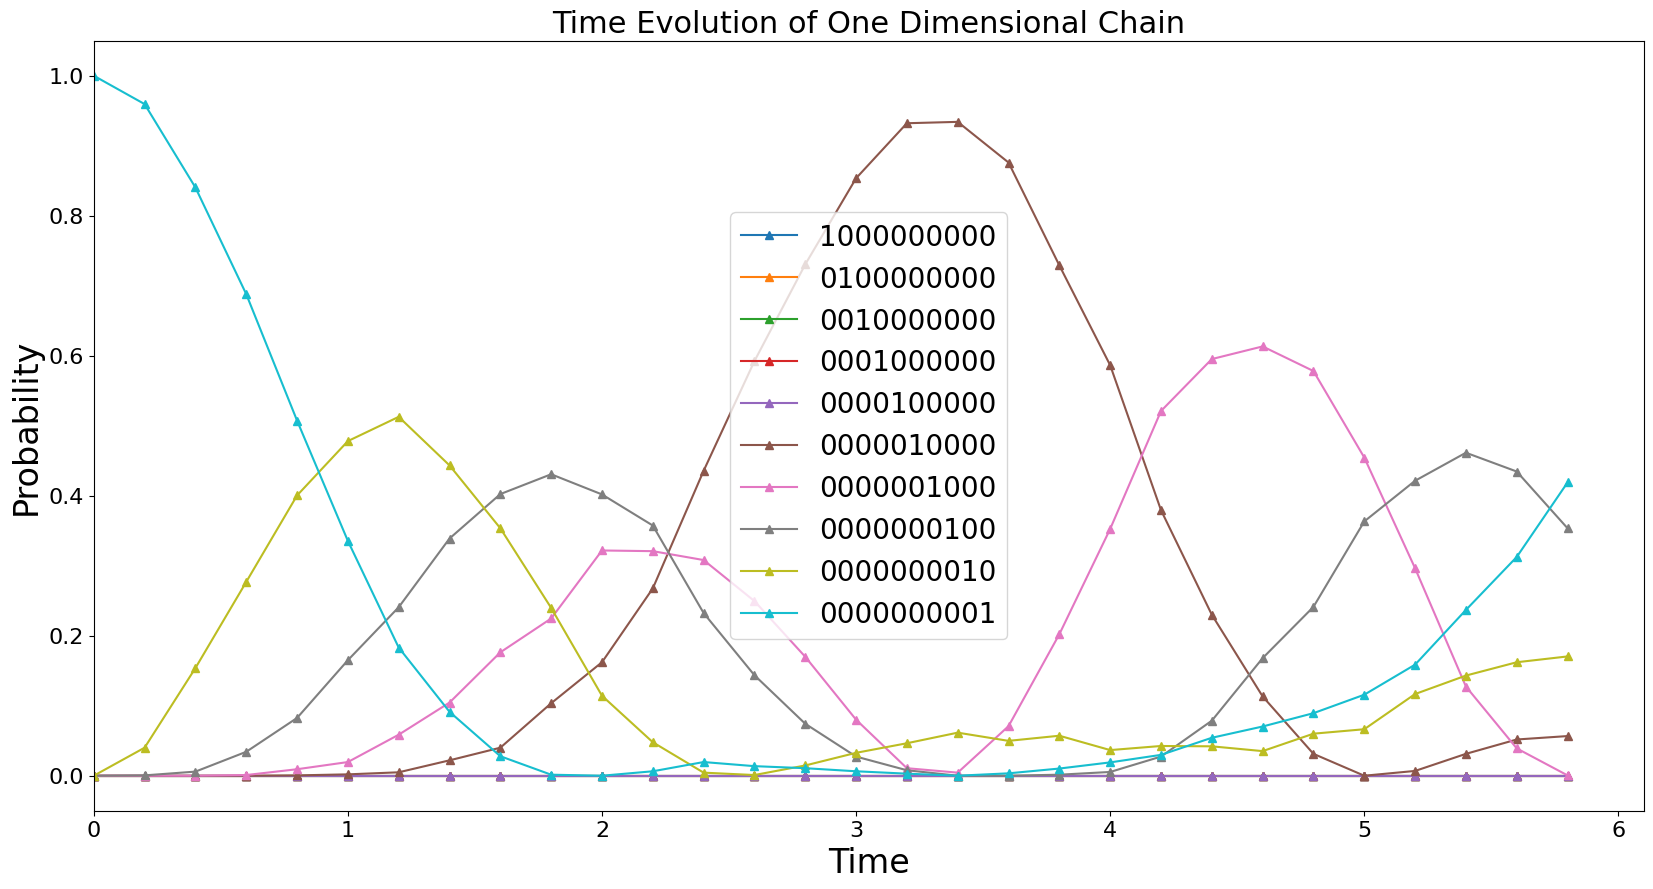

In [23]:
#Create plots of the processed data
fig2, ax2 = plt.subplots(figsize=(20,10))
colors = list(mcolors.TABLEAU_COLORS.keys())
times = np.arange(0.,time_steps*dt, dt)


for i, key in enumerate(occupancy_data.keys()):
    ax2.plot(times, occupancy_data[key], marker='^', color=str(colors[i]), label=f'{key}')

ax2.set_xlim(0, time_steps*dt+dt/2.)
ax2.tick_params(labelsize=16)
ax2.set_title('Time Evolution of One Dimensional Chain', fontsize=22)
ax2.set_xlabel('Time', fontsize=24)
ax2.set_ylabel('Probability', fontsize=24)
ax2.legend(fontsize=20)


Time Steps:  30  Step Size:  0.2


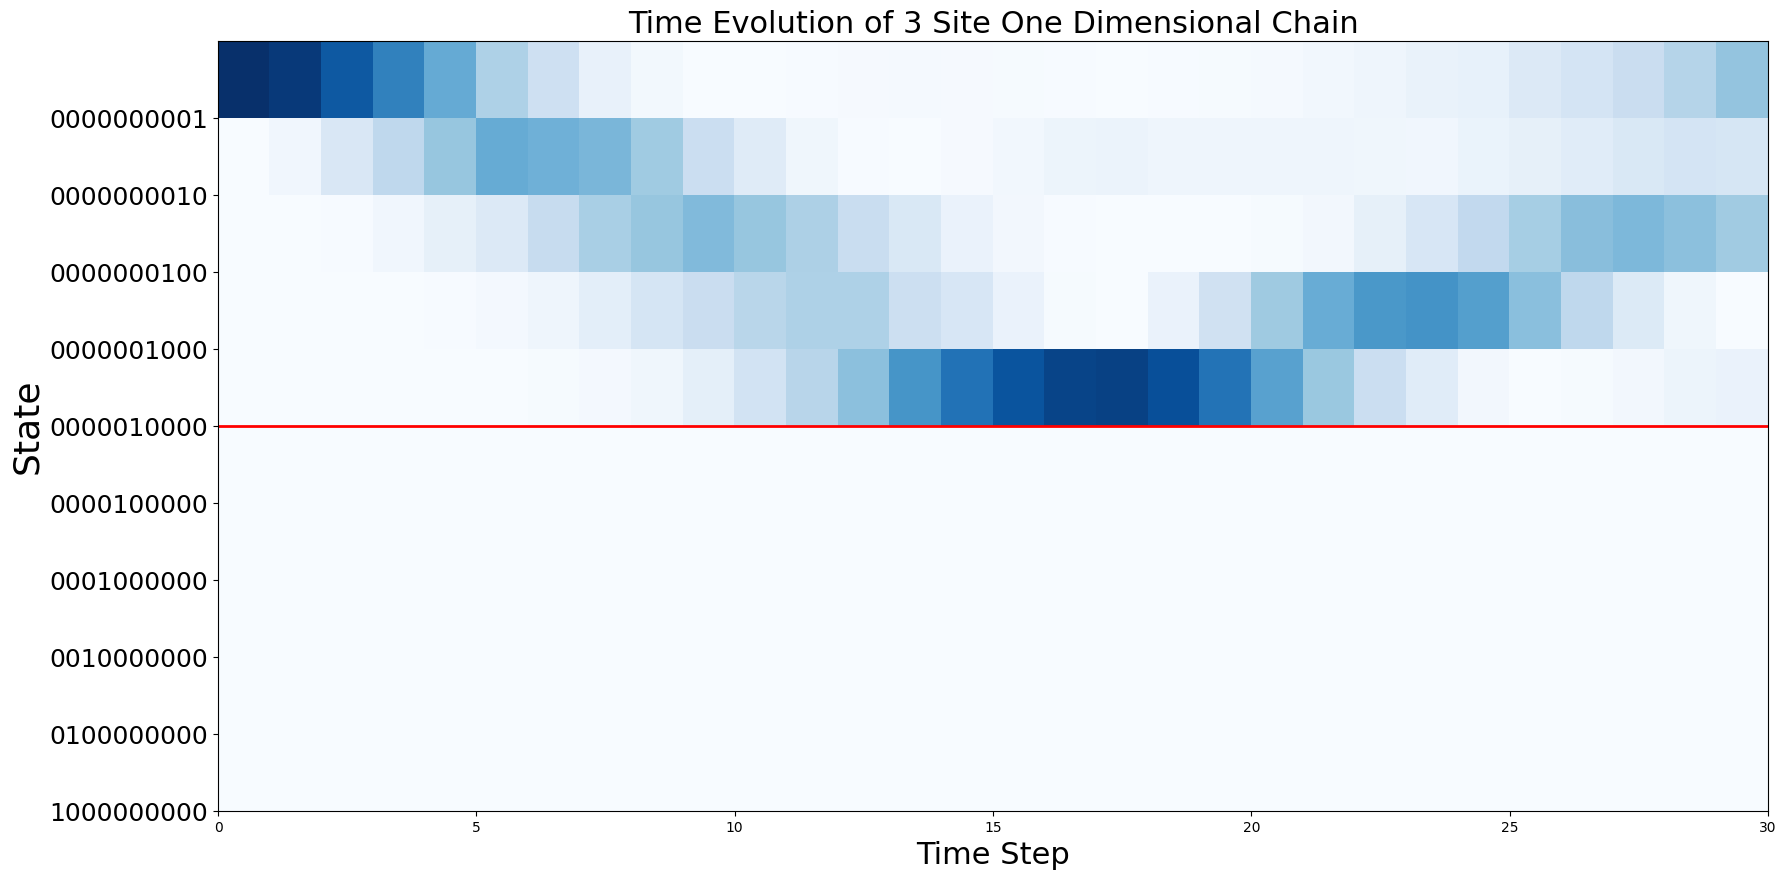

In [10]:

#Plot the raw data as a colormap
xticks = np.arange((num_sites*2))
xlabels = occupancy_data.keys()
print("Time Steps: ",time_steps, " Step Size: ",dt)

state_data = []
for label in xlabels:
    state_data.append(occupancy_data[label])

state_data = np.array(state_data)


    
fig, ax = plt.subplots(figsize=(20,10))
c = ax.pcolor(state_data, cmap='Blues')
ax.set_title('Time Evolution of 3 Site One Dimensional Chain', fontsize=22)
plt.yticks(xticks, xlabels, size=18)
ax.axhline(y=5, color='r', linewidth=2)
ax.set_xlabel('Time Step', fontsize=22)
ax.set_ylabel('State', fontsize=26)
plt.show()

